In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
path = '../data/hotel_bookings.csv' #(1)
df = pd.read_csv(path)
# df.head()

In [4]:
df2 = df.copy()

In [5]:
df2 = df2[['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month', 
         'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 
         'adults', 'children', 'babies', 'country', 'assigned_room_type', 'adr']]
df2.head()

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,assigned_room_type,adr
0,Resort Hotel,0,2015,July,1,0,0,2,0.0,0,PRT,C,0.0
1,Resort Hotel,0,2015,July,1,0,0,2,0.0,0,PRT,C,0.0
2,Resort Hotel,0,2015,July,1,0,1,1,0.0,0,GBR,C,75.0
3,Resort Hotel,0,2015,July,1,0,1,1,0.0,0,GBR,A,75.0
4,Resort Hotel,0,2015,July,1,0,2,2,0.0,0,GBR,A,98.0


### Clean the data

In [6]:
no_pay = list(df2.loc[df2['adr']==0].index)
df2.drop(df2.index[no_pay], inplace=True)

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117431 entries, 2 to 119389
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   hotel                      117431 non-null  object 
 1   is_canceled                117431 non-null  int64  
 2   arrival_date_year          117431 non-null  int64  
 3   arrival_date_month         117431 non-null  object 
 4   arrival_date_day_of_month  117431 non-null  int64  
 5   stays_in_weekend_nights    117431 non-null  int64  
 6   stays_in_week_nights       117431 non-null  int64  
 7   adults                     117431 non-null  int64  
 8   children                   117427 non-null  float64
 9   babies                     117431 non-null  int64  
 10  country                    116964 non-null  object 
 11  assigned_room_type         117431 non-null  object 
 12  adr                        117431 non-null  float64
dtypes: float64(2), int64(7), obje

In [8]:
df2.loc[:, 'arrival_date_month'].value_counts()

August       13711
July         12491
May          11611
April        10953
October      10929
June         10819
September    10351
March         9642
February      7921
November      6641
December      6561
January       5801
Name: arrival_date_month, dtype: int64

In [9]:
month = df2[['arrival_date_month', 'assigned_room_type']]

In [10]:
data = df2.copy()

In [11]:
# convert month to number 
data.loc[data['arrival_date_month']=='January', 'arrival_date_month'] = '01'
data.loc[data['arrival_date_month']=='February', 'arrival_date_month'] = '02'
data.loc[data['arrival_date_month']=='March', 'arrival_date_month'] = '03'
data.loc[data['arrival_date_month']=='April', 'arrival_date_month'] = '04'
data.loc[data['arrival_date_month']=='May', 'arrival_date_month'] = '05'
data.loc[data['arrival_date_month']=='June', 'arrival_date_month'] = '06'
data.loc[data['arrival_date_month']=='July', 'arrival_date_month'] = '07'
data.loc[data['arrival_date_month']=='August', 'arrival_date_month'] = '08'
data.loc[data['arrival_date_month']=='September', 'arrival_date_month'] = '09'
data.loc[data['arrival_date_month']=='October', 'arrival_date_month'] = '10'
data.loc[data['arrival_date_month']=='November', 'arrival_date_month'] = '11'
data.loc[data['arrival_date_month']=='December', 'arrival_date_month'] = '12'

In [12]:
# convert day format
data.loc[data['arrival_date_day_of_month']== 1, 'arrival_date_day_of_month'] = '01'
data.loc[data['arrival_date_day_of_month']== 2, 'arrival_date_day_of_month'] = '02'
data.loc[data['arrival_date_day_of_month']== 3, 'arrival_date_day_of_month'] = '03'
data.loc[data['arrival_date_day_of_month']== 4, 'arrival_date_day_of_month'] = '04'
data.loc[data['arrival_date_day_of_month']== 5, 'arrival_date_day_of_month'] = '06'
data.loc[data['arrival_date_day_of_month']== 7, 'arrival_date_day_of_month'] = '07'
data.loc[data['arrival_date_day_of_month']== 8, 'arrival_date_day_of_month'] = '08'
data.loc[data['arrival_date_day_of_month']== 9, 'arrival_date_day_of_month'] = '09'

In [13]:
data.insert(data.shape[1], 'd', '/')

In [14]:
data['arrival_date'] = data['arrival_date_day_of_month'].map(str) + data['d'] + data['arrival_date_month'].map(str) + data['d'] + data['arrival_date_year'].map(str)
#data.head()

In [15]:
data['total_stay_days'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
#data.head()

In [16]:
data['total_guests'] = data['adults'] + data['children'] + data['babies']

In [17]:
data.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'd'], axis=1, inplace=True)
#data.head()

In [18]:
data['arrival_month'] = month['arrival_date_month']
#data.head()

In [19]:
data['arrival_date'] = pd.to_datetime(data['arrival_date'], infer_datetime_format=True)
data['arrival_date'].head()

2   2015-01-07
3   2015-01-07
4   2015-01-07
5   2015-01-07
6   2015-01-07
Name: arrival_date, dtype: datetime64[ns]

In [20]:
data.head()

,hotel,is_canceled,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,assigned_room_type,adr,arrival_date,total_stay_days,total_guests,arrival_month
2,Resort Hotel,0,0,1,1,0.0,0,GBR,C,75.0,2015-01-07,1,1.0,July
3,Resort Hotel,0,0,1,1,0.0,0,GBR,A,75.0,2015-01-07,1,1.0,July
4,Resort Hotel,0,0,2,2,0.0,0,GBR,A,98.0,2015-01-07,2,2.0,July
5,Resort Hotel,0,0,2,2,0.0,0,GBR,A,98.0,2015-01-07,2,2.0,July
6,Resort Hotel,0,0,2,2,0.0,0,PRT,C,107.0,2015-01-07,2,2.0,July


In [21]:
data1 = data.copy()
data1.loc[:, 'is_canceled'].value_counts()

0    73420
1    44011
Name: is_canceled, dtype: int64

In [22]:
# 取消预定的不算
data1 = data1.loc[data['is_canceled']==0]
clean_data = data1.copy()
clean_data.drop('is_canceled', axis=1, inplace=True)
clean_data.head()

,hotel,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,assigned_room_type,adr,arrival_date,total_stay_days,total_guests,arrival_month
2,Resort Hotel,0,1,1,0.0,0,GBR,C,75.0,2015-01-07,1,1.0,July
3,Resort Hotel,0,1,1,0.0,0,GBR,A,75.0,2015-01-07,1,1.0,July
4,Resort Hotel,0,2,2,0.0,0,GBR,A,98.0,2015-01-07,2,2.0,July
5,Resort Hotel,0,2,2,0.0,0,GBR,A,98.0,2015-01-07,2,2.0,July
6,Resort Hotel,0,2,2,0.0,0,PRT,C,107.0,2015-01-07,2,2.0,July


In [23]:
# Resort Hotel
rh = clean_data.loc[clean_data['hotel']=='Resort Hotel']
rh.head()

,hotel,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,assigned_room_type,adr,arrival_date,total_stay_days,total_guests,arrival_month
2,Resort Hotel,0,1,1,0.0,0,GBR,C,75.0,2015-01-07,1,1.0,July
3,Resort Hotel,0,1,1,0.0,0,GBR,A,75.0,2015-01-07,1,1.0,July
4,Resort Hotel,0,2,2,0.0,0,GBR,A,98.0,2015-01-07,2,2.0,July
5,Resort Hotel,0,2,2,0.0,0,GBR,A,98.0,2015-01-07,2,2.0,July
6,Resort Hotel,0,2,2,0.0,0,PRT,C,107.0,2015-01-07,2,2.0,July


In [24]:
# City Hotel
ch = clean_data.loc[clean_data['hotel']=='City Hotel']
ch.head()

,hotel,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,assigned_room_type,adr,arrival_date,total_stay_days,total_guests,arrival_month
40066,City Hotel,0,3,1,0.0,0,PRT,A,58.67,2015-02-07,3,1.0,July
40070,City Hotel,0,2,2,0.0,0,PRT,A,86.00,2015-03-07,2,2.0,July
40071,City Hotel,0,2,2,0.0,0,PRT,A,43.00,2015-03-07,2,2.0,July
40072,City Hotel,0,2,2,0.0,0,PRT,A,86.00,2015-03-07,2,2.0,July
40073,City Hotel,0,2,1,0.0,0,PRT,A,63.00,2015-03-07,2,1.0,July


## 3.2 How much does a guest pay for a room per night?

In [25]:
clean_data.head()

,hotel,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,assigned_room_type,adr,arrival_date,total_stay_days,total_guests,arrival_month
2,Resort Hotel,0,1,1,0.0,0,GBR,C,75.0,2015-01-07,1,1.0,July
3,Resort Hotel,0,1,1,0.0,0,GBR,A,75.0,2015-01-07,1,1.0,July
4,Resort Hotel,0,2,2,0.0,0,GBR,A,98.0,2015-01-07,2,2.0,July
5,Resort Hotel,0,2,2,0.0,0,GBR,A,98.0,2015-01-07,2,2.0,July
6,Resort Hotel,0,2,2,0.0,0,PRT,C,107.0,2015-01-07,2,2.0,July


In [26]:
df2 = clean_data

In [27]:
df2['adr'].describe()

count    73420.000000
mean       102.365499
std         47.280317
min         -6.380000
25%         70.000000
50%         94.500000
75%        126.000000
max        510.000000
Name: adr, dtype: float64

In [28]:
df2['total_stay_days'].describe()

count    73420.000000
mean         3.435971
std          2.542487
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         69.000000
Name: total_stay_days, dtype: float64

In [29]:
df2['total_guests'].describe()

count    73420.000000
mean         1.952819
std          0.663348
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         12.000000
Name: total_guests, dtype: float64

In [30]:
# clean data: adr<0 or total_guests=0
df2 = df2[df2['adr'] >= 0]
df2 = df2[df2['total_guests'] > 0]

In [31]:
# price_guest_per_night = adr / total_stay_days / total_guests
df2['price_guest_per_night'] = df2['adr']/df2['total_stay_days']/df2['total_guests']
df2['price_guest_per_night'].describe()

count    73388.000000
mean        26.144558
std         24.714045
min          0.003421
25%         10.333333
50%         17.956667
75%         32.666667
max        510.000000
Name: price_guest_per_night, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9b2b83e20>]],
      dtype=object)

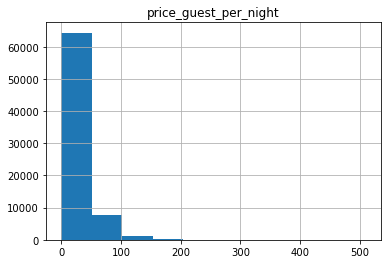

In [32]:
# count
df2.hist('price_guest_per_night')

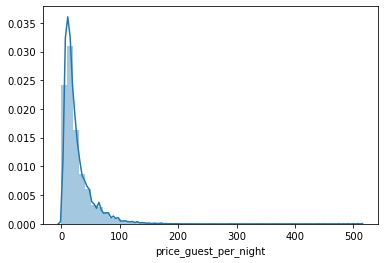

In [33]:
# distribution
sns.distplot(df2['price_guest_per_night'])

## 3.3 How long does the guest stay in the hotel?

In [34]:
df2['total_stay_days'].describe()

count    73388.000000
mean         3.434008
std          2.533484
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         69.000000
Name: total_stay_days, dtype: float64

In [35]:
df2['total_stay_days'].value_counts()

3     15604
1     15280
2     15154
4     10971
7      5666
5      5093
6      2303
10      776
8       707
14      653
9       518
11      272
12      120
13       89
15       36
21       36
28       22
16       18
17       15
25       14
22        9
19        6
18        6
35        5
42        3
23        2
56        1
69        1
45        1
38        1
29        1
34        1
30        1
24        1
20        1
60        1
Name: total_stay_days, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9961c4e20>]],
      dtype=object)

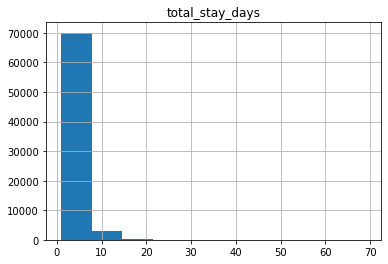

In [38]:
# count
df2.hist('total_stay_days')

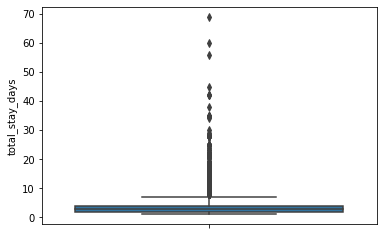

In [39]:
sns.boxplot(df2['total_stay_days'],orient = "v")